# PREDICTION MODELS (REGRESSION)

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
#import lux
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np

In [4]:
#import matplotlib
#matplotlib.style.use("ggplot")
#%matplotlib notebook

In [5]:
data = pd.read_csv(r'sales.csv')
data.set_index("Date", inplace =True)
data.head()

,Sales,Cus
Date,,
11-Apr-18,4388.23,577
12-Apr-18,5206.76,705
13-Apr-18,1784.65,365
14-Apr-18,2419.71,391
15-Apr-18,2462.46,375


In [6]:
len(data)

996

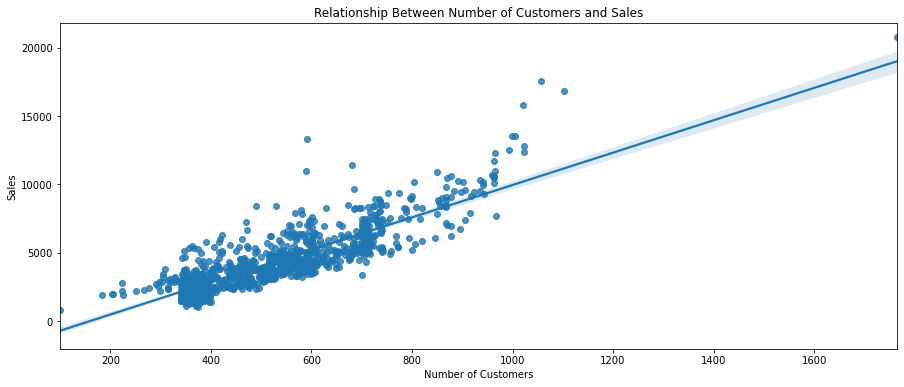

In [7]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.regplot(x = data["Cus"], y = data["Sales"])
pyplot.xlabel("Number of Customers")
pyplot.ylabel("Sales")
pyplot.title("Relationship Between Number of Customers and Sales")
pyplot.show()

In [8]:
##CORRELATION ANALYSIS
data.corr()

,Sales,Cus
Sales,1.000000,0.854665
Cus,0.854665,1.000000


In [9]:
##COVARIANCE ANALYSIS
data.cov()

,Sales,Cus
Sales,5.209155e+06,321123.112717
Cus,3.211231e+05,27100.914670


In [10]:
from sklearn.model_selection import train_test_split
X = data[["Cus"]]
y = data[["Sales"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0,shuffle = False)
y_testCopy = y_test.copy()


In [14]:
actual_pred = y_testCopy
actual_pred=actual_pred.rename(columns={"Sales":"Actual Sales"})

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn import linear_model
from sklearn.datasets import make_regression

In [17]:
def regression_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

## Regression Models

In [18]:
## OLS Regression
linreg = LinearRegression()
linregmod=linreg.fit(X_train,y_train)
y_predlinreg = linreg.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predlinreg))

Evaluation metric results:-
MSE is : 4550362.283336706
MAE is : 1444.1462622436493
RMSE is : 2133.157819603769
MAPE is : 17.493267975657368
R2 is : 0.5563342412561322

None


In [19]:
print("OLS Model parameters:",linregmod.get_params())
print("OLS Model score:",linregmod.score(X_train,y_train)*100,"%")
print("OLS Model Coefficient:",linregmod.coef_)
print("OLS Model Intercept:",linregmod.intercept_)

OLS Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
OLS Model score: 68.93444583488598 %
OLS Model Coefficient: [[10.42776843]]
OLS Model Intercept: [-1243.16924702]


In [20]:
y_predlinreg
y_predlinreg = pd.DataFrame(y_predlinreg)
y_predlinreg

,0
0,4439.964549
1,6462.951625
2,4909.214129
3,6452.523857
4,6337.818404
...,...
95,3918.576127
96,6337.818404
97,6452.523857
98,3772.587369


In [21]:
y_predlinreg.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_OLSpredictions_dataframe.csv",index = False,header=True)

In [25]:
actual_pred["OLS Regression"]=y_predlinreg.values
OLS=actual_pred

In [26]:
OLSresidual=y_test.values-y_predlinreg.values
OLSresidualframe = pd.DataFrame(OLSresidual) 

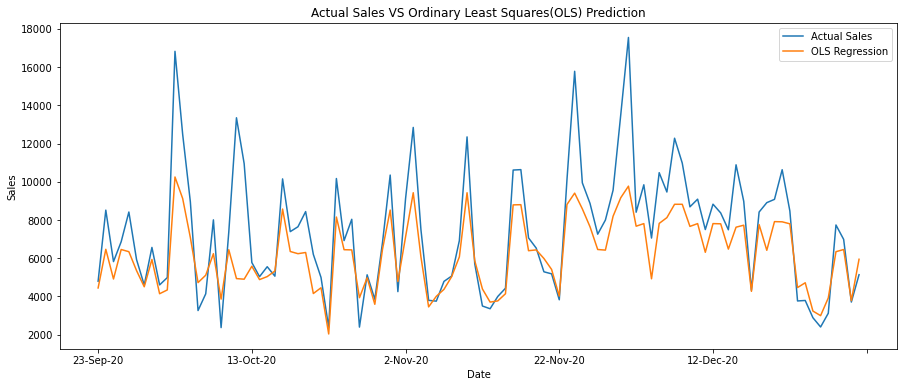

In [27]:
OLS['Actual Sales'].plot(figsize=(15,6), label="Actual Sales")
OLS['OLS Regression'].plot(figsize=(15,6), label="OLS Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Ordinary Least Squares(OLS) Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

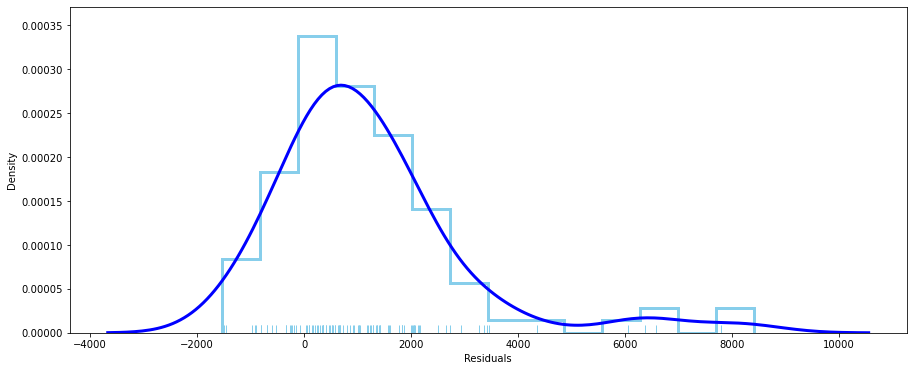

In [28]:
## Normality test
sns.distplot(OLSresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'OLS HomoscedasticityPlot (Predicted vs Residuals)')

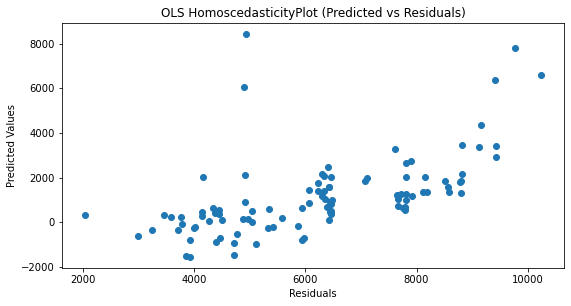

In [29]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predlinreg,OLSresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("OLS HomoscedasticityPlot (Predicted vs Residuals)")

In [30]:
## POLYNOMIAL REG

poly = PolynomialFeatures() 
train_poly=poly.fit_transform(X_train)
test_poly=poly.fit_transform(X_test)
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y_train)
prediction_poly=linreg.predict(test_poly)
print(regression_evaluation_metrics_func(y_test,prediction_poly))

Evaluation metric results:-
MSE is : 4035933.399217433
MAE is : 1360.2663527193163
RMSE is : 2008.9632647754993
MAPE is : 16.685072250187982
R2 is : 0.6064916720234201

None


In [31]:
print("Polynimial Reg Model parameters:",linreg.get_params())
print("Polynimial Reg Model score:",linreg.score(train_poly,y_train)*100,"%")
print("Polynimial Reg Model Coefficients:",linreg.coef_)
print("Polynimial Reg Model Intercept:",linreg.intercept_)
print("Polynimial Reg Model number of features:",linreg.n_features_in_)

Polynimial Reg Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
Polynimial Reg Model score: 69.88861269618248 %
Polynimial Reg Model Coefficients: [[0.00000000e+00 6.24262688e+00 3.50295172e-03]]
Polynimial Reg Model Intercept: [-92.42332846]
Polynimial Reg Model number of features: 3


In [32]:
poly_pred=pd.DataFrame(prediction_poly)

poly_pred.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_PolynomialRegpredictions_dataframe.csv",index = False,header=True)

In [33]:
actual_pred["Polynomial Regression"]=prediction_poly
poly=actual_pred

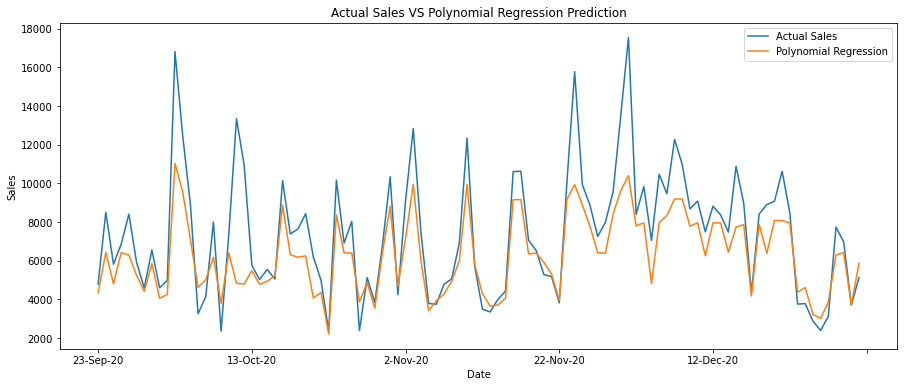

In [34]:
poly['Actual Sales'].plot(figsize=(15,6), label ="Actual Sales")
poly['Polynomial Regression'].plot(figsize=(15,6), label ="Polynomial Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Polynomial Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [35]:
Polyresidual=y_test-prediction_poly


<AxesSubplot:xlabel='Residuals', ylabel='Density'>

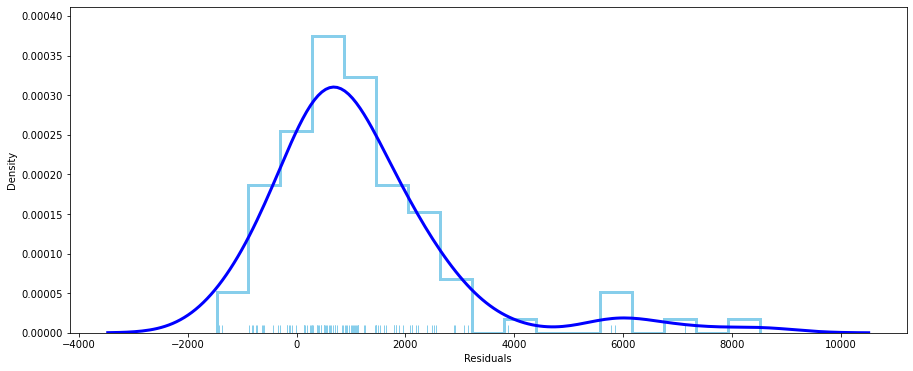

In [36]:
## Normality test
sns.distplot(Polyresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'Polynomial Regression HomoscedasticityPlot (Predicted vs Residuals)')

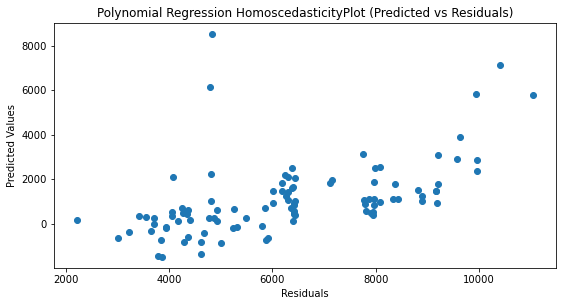

In [37]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(prediction_poly,Polyresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("Polynomial Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [38]:
##TheilSen Regression

thei = TheilSenRegressor().fit(X_train,y_train)
thei.fit(X_train,y_train)
y_predthei = thei.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predthei))

Evaluation metric results:-
MSE is : 6033833.81167049
MAE is : 1761.9759142487342
RMSE is : 2456.3863319255156
MAPE is : 43.87007308105764
R2 is : 0.4116939950051215

None


In [39]:
print("Theil-Sen Regression Model parameters:",thei.get_params())
print("Theil-Sen Regression Model score:",thei.score(X_train,y_train)*100,"%")
print("Theil-Sen Regression Model Coefficients:",thei.coef_)
print("Theil-Sen Regression Model Intercept:",thei.intercept_)
print("Theil-Sen Regression Model number of features:",thei.n_features_in_)

Theil-Sen Regression Model parameters: {'copy_X': True, 'fit_intercept': True, 'max_iter': 300, 'max_subpopulation': 10000, 'n_jobs': None, 'n_subsamples': None, 'random_state': None, 'tol': 0.001, 'verbose': False}
Theil-Sen Regression Model score: 66.70419177959914 %
Theil-Sen Regression Model Coefficients: [9.577279]
Theil-Sen Regression Model Intercept: -1050.831048444371
Theil-Sen Regression Model number of features: 1


In [40]:
print(thei.breakdown_)
print(thei.coef_)
print(thei.get_params())
print(thei.intercept_)
print(thei.max_iter)

0.29256632906031244
[9.577279]
{'copy_X': True, 'fit_intercept': True, 'max_iter': 300, 'max_subpopulation': 10000, 'n_jobs': None, 'n_subsamples': None, 'random_state': None, 'tol': 0.001, 'verbose': False}
-1050.831048444371
300


In [41]:
y_predthei=y_predthei.reshape(100,1)


In [42]:
theipred=pd.DataFrame(y_predthei)
theipred.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_Thei-Senpredictions_dataframe.csv",index = False,header=True)

In [43]:
actual_pred["Thei-Sen Regression"]=y_predthei
Thei=actual_pred

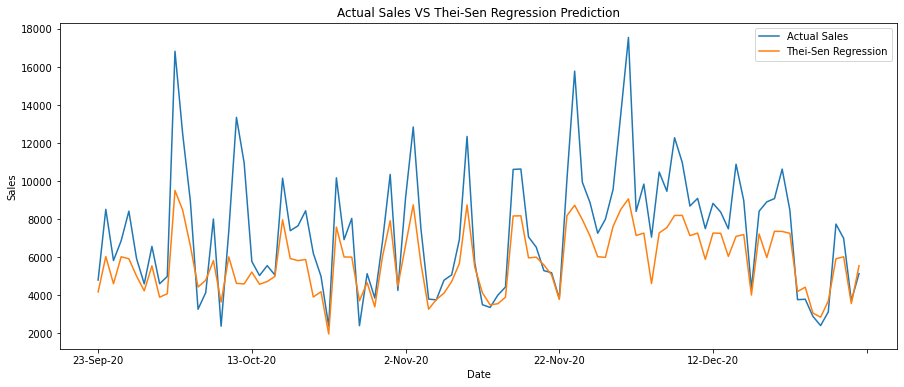

In [44]:
Thei['Actual Sales'].plot(figsize=(15,6), label="Actual Sales")
Thei['Thei-Sen Regression'].plot(figsize=(15,6), label="Thei-Sen Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Thei-Sen Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [45]:
Theiresidual=y_test.values-y_predthei

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

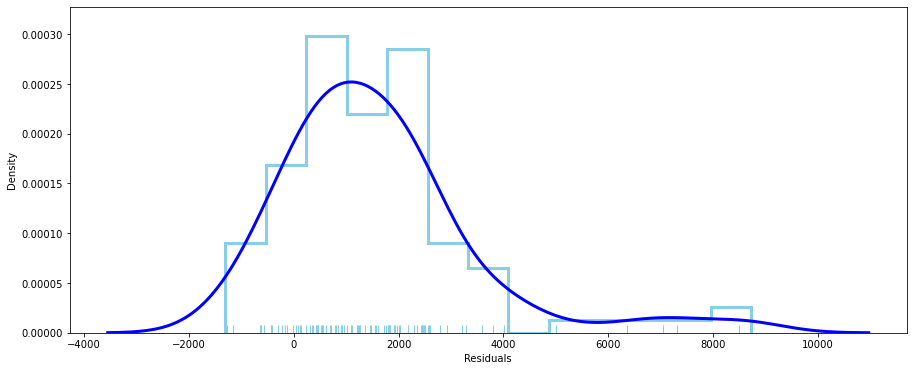

In [46]:
## Normality test
sns.distplot(Theiresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'Thei-Sen Regression HomoscedasticityPlot (Predicted vs Residuals)')

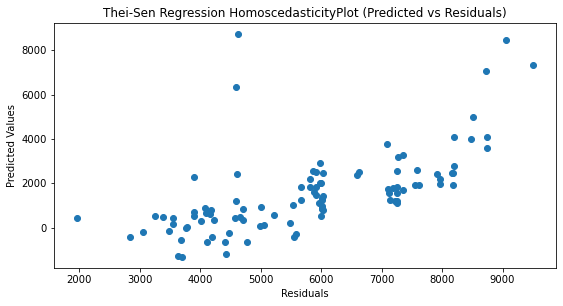

In [47]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predthei,Theiresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("Thei-Sen Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [48]:
##RANSAC Regression

ransac = linear_model.RANSACRegressor()
ransac.fit(X_train,y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
y_predransac = ransac.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predransac))

Evaluation metric results:-
MSE is : 3777617.012332074
MAE is : 1266.7599625246119
RMSE is : 1943.6092746053857
MAPE is : 15.63348032250333
R2 is : 0.6316778283440172

None


In [49]:
print("RANSAC Regression Model parameters:",ransac.get_params())
print("RANSAC Regression Model score:",ransac.score(X_train,y_train)*100,"%")
print("RANSAC Regression Model number of features:",ransac.n_features_in_)

RANSAC Regression Model parameters: {'base_estimator': None, 'is_data_valid': None, 'is_model_valid': None, 'loss': 'absolute_loss', 'max_skips': inf, 'max_trials': 100, 'min_samples': None, 'random_state': None, 'residual_threshold': None, 'stop_n_inliers': inf, 'stop_probability': 0.99, 'stop_score': inf}
RANSAC Regression Model score: 67.40177458236765 %
RANSAC Regression Model number of features: 1


In [50]:
predRN= pd.DataFrame(y_predransac)
predRN.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_RANSACpredictions_dataframe.csv",index = False,header=True)

In [51]:
actual_pred["RANSAC"]=y_predransac
RAN=actual_pred

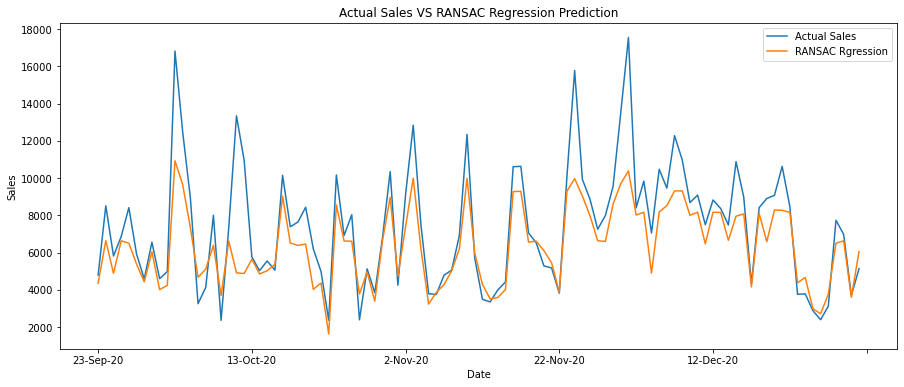

In [52]:
RAN['Actual Sales'].plot(figsize=(15,6), label="Actual Sales")
RAN['RANSAC'].plot(figsize=(15,6), label="RANSAC Rgression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS RANSAC Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [53]:
inlier= ransac.inlier_mask_
outlier = np.logical_not(inlier)
line_x = np.arange(3,51,2)
line_y = ransac.predict(line_x[:,np.newaxis])
plt.scatter(y_train[inlier], y[inlier],c = 'lightblue', maker ='o', label = "Inliers")
plt.scatter(data[["Cus"]][outlier], y[outlier],c = 'green', maker ='s', label = "Outliers")
plt.plot(line_x,line_y, color="black")
plt.xlabel("")
plt.xlabel("Number of Customers")
plt.ylabel("Sales")
plt.legend(loc = "upper left")

ValueError: Item wrong length 896 instead of 996.

In [54]:
#len(data["Cus"][inlier])

In [55]:
RANSACresidual=y_test.values-y_predransac

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

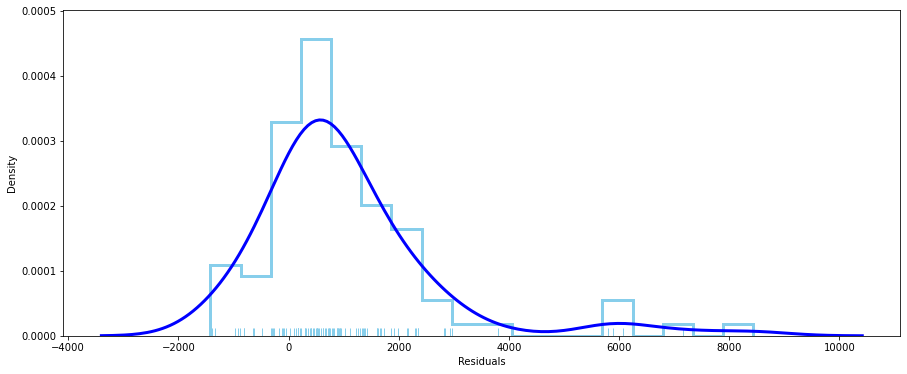

In [56]:
## Normality test
sns.distplot(RANSACresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'RANSAC Regression HomoscedasticityPlot (Predicted vs Residuals)')

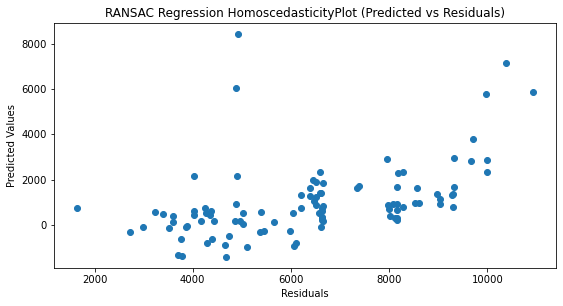

In [57]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predransac,RANSACresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("RANSAC Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [58]:
##Huber Regression
huber = HuberRegressor().fit(X_train,y_train)
y_predhuber = huber.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predhuber))

Evaluation metric results:-
MSE is : 5610022.730251348
MAE is : 1673.1832654000025
RMSE is : 2368.548654820362
MAPE is : 44.15282932264391
R2 is : 0.4530160817520261

None


In [59]:
print("Huber Regression Model parameters:",huber.get_params())
print("Huber Regression Model score:",huber.score(X_train,y_train)*100,"%")
print("Huber Regression Model Coefficients:",huber.coef_)
print("Huber Regression Model Intercept:",huber.intercept_)
print("Huber Regression Model number of features:",huber.n_features_in_)

Huber Regression Model parameters: {'alpha': 0.0001, 'epsilon': 1.35, 'fit_intercept': True, 'max_iter': 100, 'tol': 1e-05, 'warm_start': False}
Huber Regression Model score: 67.85994885778612 %
Huber Regression Model Coefficients: [9.73689299]
Huber Regression Model Intercept: -1048.3130858749814
Huber Regression Model number of features: 1


In [60]:
y_predhuber=y_predhuber.reshape(100,1)

In [61]:
predM= pd.DataFrame(y_predhuber)
predM.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_Huberpredictions_dataframe.csv",index = False,header=True)

In [63]:
actual_pred["Huber Regression"]=y_predhuber
Huber=actual_pred

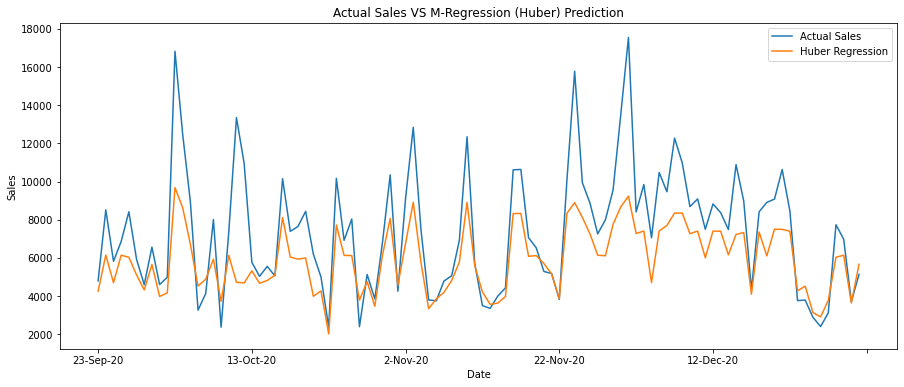

In [64]:
Huber['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
Huber['Huber Regression'].plot(figsize=(15,6),label="Huber Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS M-Regression (Huber) Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [65]:
Mresidual=y_test.values-y_predhuber

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

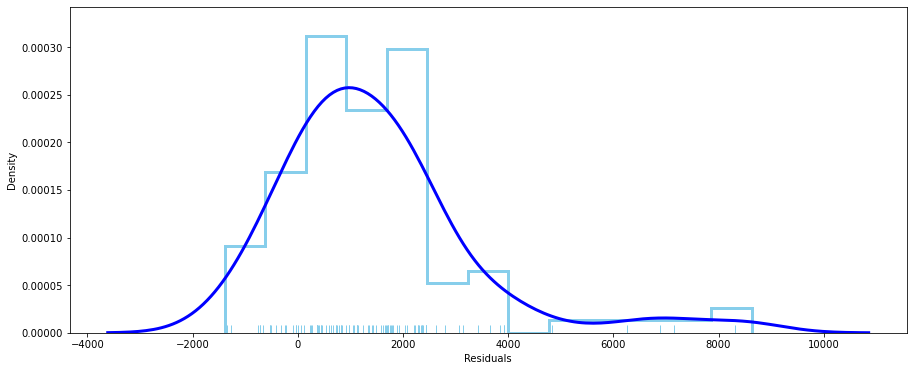

In [66]:
## Normality test
sns.distplot(Mresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'Huber Regression HomoscedasticityPlot (Predicted vs Residuals)')

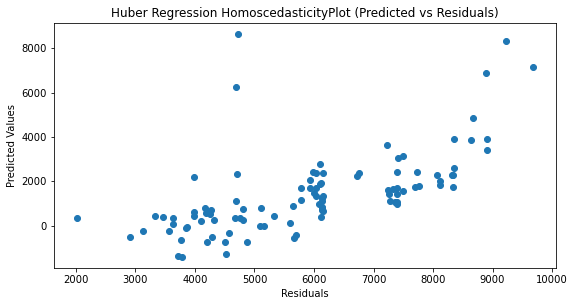

In [67]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predhuber,Mresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("Huber Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [68]:
## Support Vector Regression
supportvectorRegmodel= LinearSVR()
supportvectorRegmodel.fit(X_train,y_train)
y_predSupportVectorReg = supportvectorRegmodel.predict(X_test)  
print(regression_evaluation_metrics_func(y_test,y_predSupportVectorReg))

Evaluation metric results:-
MSE is : 7169545.653218621
MAE is : 1938.6098826066054
RMSE is : 2677.6007269977017
MAPE is : 42.14614146882991
R2 is : 0.30096073366897946

None


In [69]:
supportvectorRegmodel.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [70]:
print("Support Vector Reg Model parameters:",supportvectorRegmodel.get_params())
print("Support Vector Reg Model score:",supportvectorRegmodel.score(X_train,y_train)*100,"%")
print("Support Vector Reg Model Coefficients:",supportvectorRegmodel.coef_)
print("Support Vector Reg Model Intercept:",supportvectorRegmodel.intercept_)
print("Support Vector Reg Model number of features:",supportvectorRegmodel.n_features_in_)

Support Vector Reg Model parameters: {'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Support Vector Reg Model score: 65.04002804269746 %
Support Vector Reg Model Coefficients: [7.99879783]
Support Vector Reg Model Intercept: [-44.37318012]
Support Vector Reg Model number of features: 1


In [71]:
y_predSupportVectorReg=y_predSupportVectorReg.reshape(100,1)

In [72]:
predSVR= pd.DataFrame(y_predSupportVectorReg)
predSVR.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_SVRpredictions_dataframe.csv",index = False,header=True)

In [73]:
actual_pred["SVR Regression"]=y_predSupportVectorReg
SVR=actual_pred

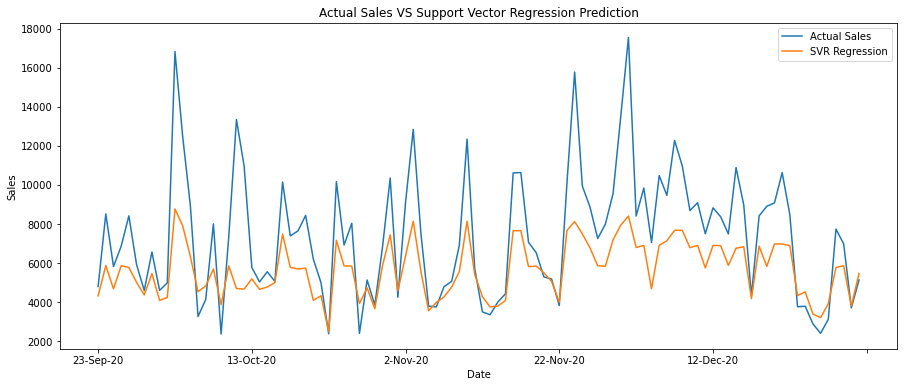

In [74]:
SVR['Actual Sales'].plot(figsize=(15,6),label = "Actual Sales")
SVR['SVR Regression'].plot(figsize=(15,6),label = "SVR Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Support Vector Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [75]:
SVR_residuals=y_test.values-y_predSupportVectorReg

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

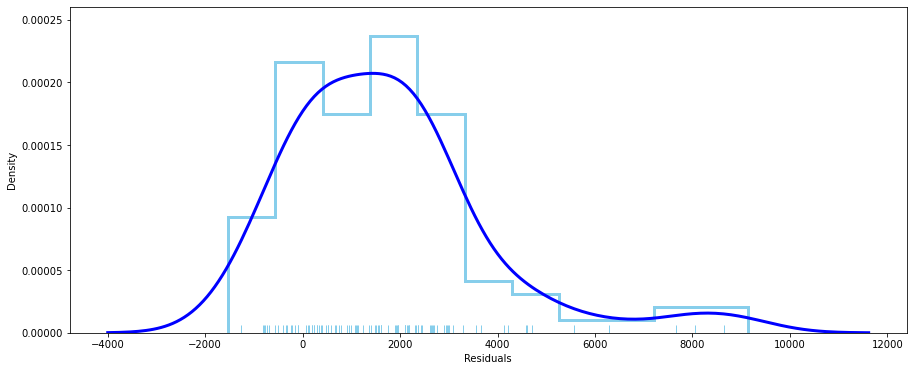

In [76]:
## Normality test
sns.distplot(SVR_residuals,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'SVR Regression HomoscedasticityPlot (Predicted vs Residuals)')

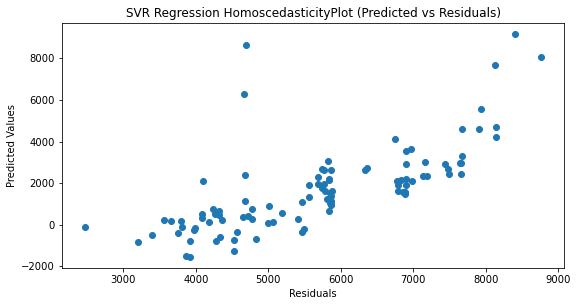

In [77]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predSupportVectorReg,SVR_residuals)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("SVR Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [78]:
## Decision Tree Regression
regressor = DecisionTreeRegressor(random_state = True)
regressor.fit(X_train, y_train)
ypred_dctree=regressor.predict(X_test)
print(regression_evaluation_metrics_func(y_test,ypred_dctree))

Evaluation metric results:-
MSE is : 4108073.0416448754
MAE is : 1488.6162816666665
RMSE is : 2026.8381883231023
MAPE is : 52.01991516522959
R2 is : 0.599457970704673

None


In [79]:
print("Decision Tree Regression Model parameters:",regressor.get_params())
print("Decision Tree Regression Model score:",regressor.score(X_train,y_train)*100,"%")
print("Decision Tree Regression number of features:",regressor.n_features_in_)

Decision Tree Regression Model parameters: {'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': True, 'splitter': 'best'}
Decision Tree Regression Model score: 86.60493615796116 %
Decision Tree Regression number of features: 1


[Text(437.1563763198003, 319.365, 'X[0] <= 528.5\nmse = 3630292.745\nsamples = 896\nvalue = 4224.554'),
 Text(169.1547659149143, 305.77500000000003, 'X[0] <= 405.5\nmse = 1208950.767\nsamples = 473\nvalue = 3031.93'),
 Text(34.603068673793956, 292.185, 'X[0] <= 214.5\nmse = 717295.995\nsamples = 279\nvalue = 2520.064'),
 Text(4.732991694645697, 278.595, 'X[0] <= 141.5\nmse = 237254.803\nsamples = 4\nvalue = 1654.738'),
 Text(2.3664958473228483, 265.005, 'mse = 0.0\nsamples = 1\nvalue = 811.15'),
 Text(7.099487541968545, 265.005, 'X[0] <= 193.0\nmse = 55.351\nsamples = 3\nvalue = 1935.933'),
 Text(4.732991694645697, 251.41500000000002, 'mse = 0.0\nsamples = 1\nvalue = 1926.05'),
 Text(9.465983389291393, 251.41500000000002, 'X[0] <= 204.5\nmse = 9.766\nsamples = 2\nvalue = 1940.875'),
 Text(7.099487541968545, 237.82500000000002, 'mse = 0.0\nsamples = 1\nvalue = 1937.75'),
 Text(11.832479236614242, 237.82500000000002, 'mse = 0.0\nsamples = 1\nvalue = 1944.0'),
 Text(64.47314565294221, 278

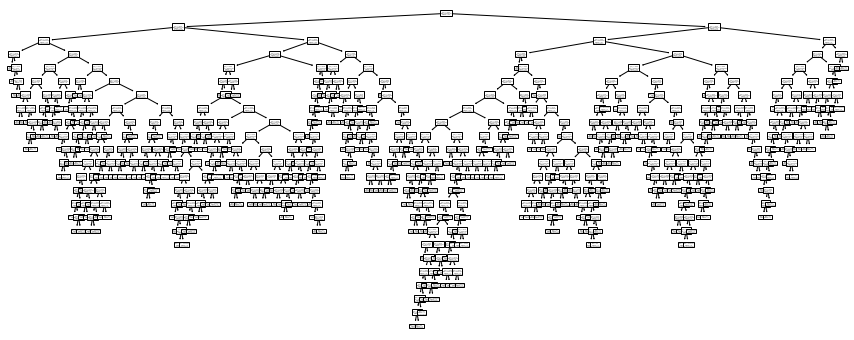

In [80]:
from sklearn import tree
tree.plot_tree(regressor)

In [81]:
#import graphviz

In [82]:
ypred_dctree=ypred_dctree.reshape(100,1)

In [83]:
preddct= pd.DataFrame(ypred_dctree)
preddct.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_DecisionTreepredictions_dataframe.csv",index = False,header=True)

In [84]:
actual_pred["Decision Tree Regression"]=ypred_dctree
DCT=actual_pred

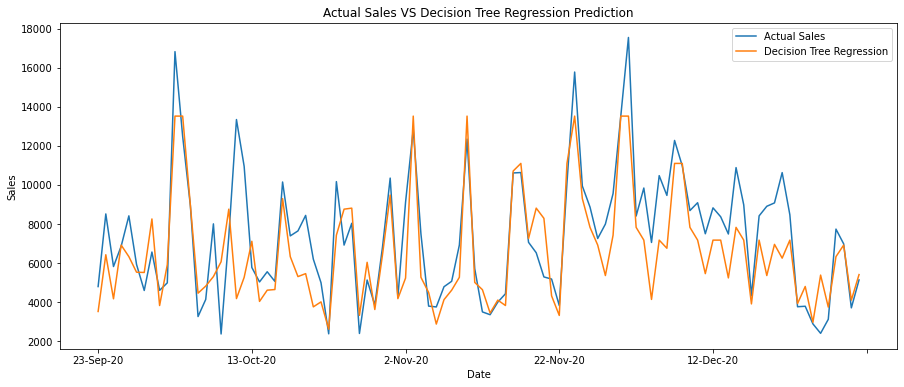

In [85]:
DCT['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
DCT['Decision Tree Regression'].plot(figsize=(15,6), label = "Decision Tree Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Decision Tree Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [86]:
dctreeRes = y_test.values-ypred_dctree

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

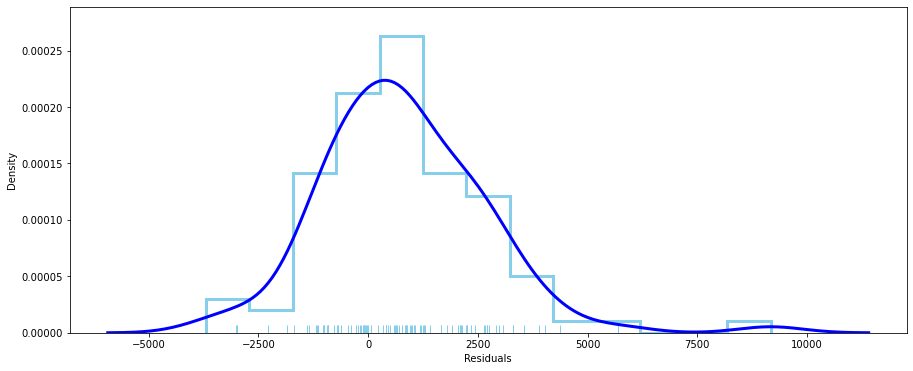

In [87]:
## Normality test
sns.distplot(dctreeRes,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'Decision Tree Regression HomoscedasticityPlot (Predicted vs Residuals)')

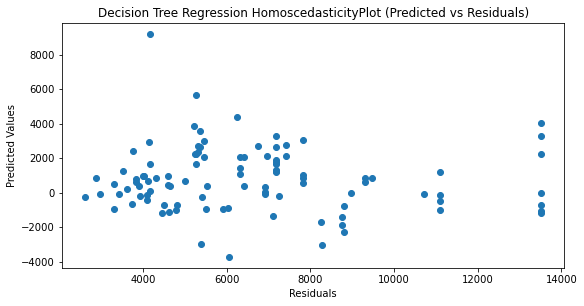

In [88]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(ypred_dctree,dctreeRes)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("Decision Tree Regression HomoscedasticityPlot (Predicted vs Residuals)")

## Ensemble Methods

In [89]:
## Bagging meta-estimator

from sklearn.ensemble import BaggingRegressor
model_bme = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model_bme.fit(X_train, y_train)
ypred_bme=regressor.predict(X_test)
print(regression_evaluation_metrics_func(y_test,ypred_bme))

Evaluation metric results:-
MSE is : 4108073.0416448754
MAE is : 1488.6162816666665
RMSE is : 2026.8381883231023
MAPE is : 52.01991516522959
R2 is : 0.599457970704673

None


In [90]:
print("Bagging meta-estimator Regression Model parameters:",model_bme.get_params())
print("Bagging meta-estimator Regression Model score:",model_bme.score(X_train,y_train)*100,"%")
print("Bagging meta-estimator Regression number of features:",model_bme.n_features_in_)

Bagging meta-estimator Regression Model parameters: {'base_estimator__ccp_alpha': 0.0, 'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': 1, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeRegressor(random_state=1), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Bagging meta-estimator Regression Model score: 83.83782905284384 %
Bagging meta-estimator Regression number of features: 1


In [91]:
ypred_bme=ypred_bme.reshape(100,1)

In [92]:
predbme= pd.DataFrame(ypred_bme)
predbme.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_BMEpredictions_dataframe.csv",index = False,header=True)

In [93]:
actual_pred["bme"]=ypred_bme
bme=actual_pred

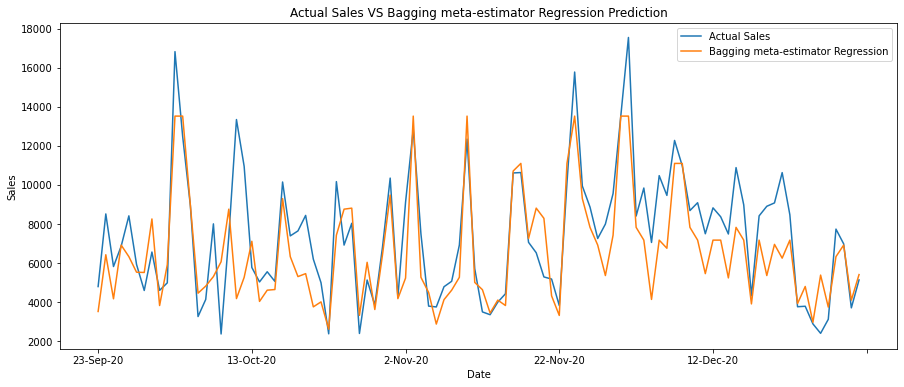

In [94]:
bme['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
bme['bme'].plot(figsize=(15,6), label = "Bagging meta-estimator Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Bagging meta-estimator Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [95]:
bmeResidual=y_test.values-ypred_bme

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

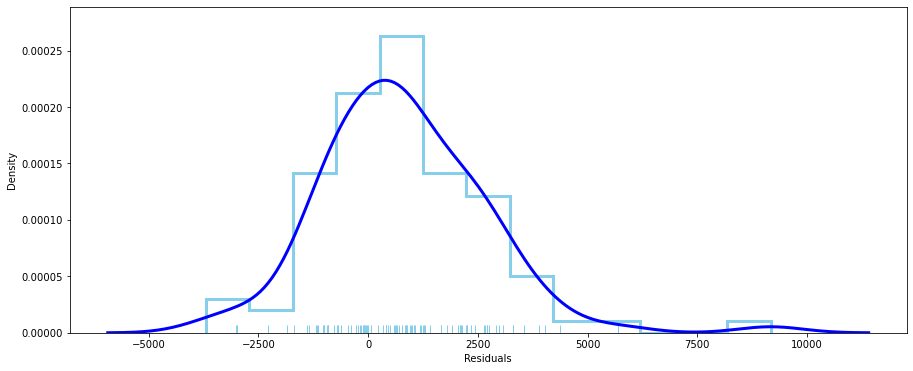

In [96]:
## Normality test
sns.distplot(bmeResidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'BME Regression HomoscedasticityPlot (Predicted vs Residuals)')

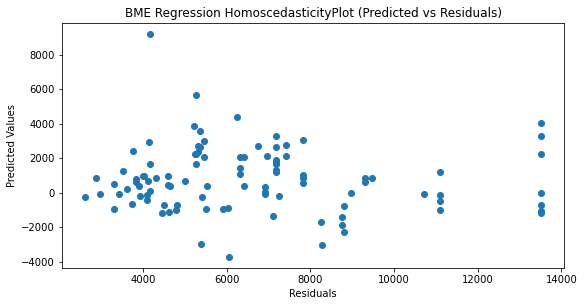

In [97]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(ypred_bme,bmeResidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("BME Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [98]:
##Random Forest
RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train,y_train)
y_predRandomForest = RandomForestModel.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predRandomForest))

Evaluation metric results:-
MSE is : 3975409.460780603
MAE is : 1418.734999989063
RMSE is : 1993.8428876871424
MAPE is : 49.717607708230155
R2 is : 0.6123928283263096

None


In [99]:
print("Random Forest Regression Model parameters:",RandomForestModel.get_params())
print("Random Forest Regression Model score:",RandomForestModel.score(X_train,y_train)*100,"%")
print("Random Forest Regression number of features:",RandomForestModel.n_features_in_)

Random Forest Regression Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Random Forest Regression Model score: 84.4751452539388 %
Random Forest Regression number of features: 1


In [100]:
y_predRandomForest=y_predRandomForest.reshape(100,1)

In [101]:
predRF= pd.DataFrame(y_predRandomForest)
predRF.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_RandomForestpredictions_dataframe.csv",index = False,header=True)

In [102]:
actual_pred["rf"]=y_predRandomForest
rf=actual_pred

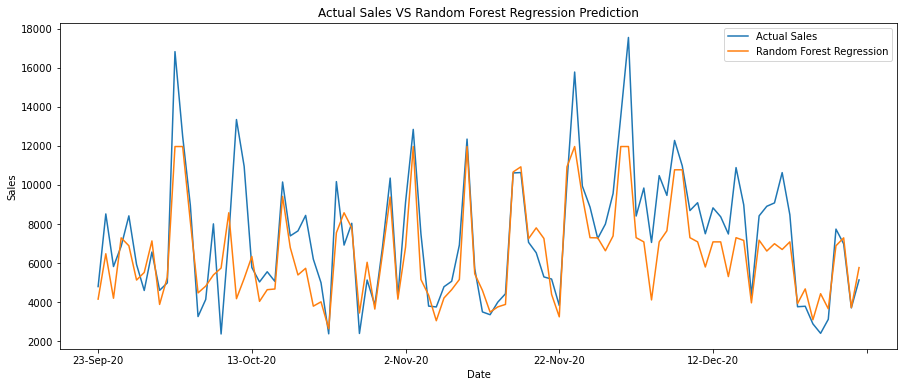

In [103]:
rf['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
rf['rf'].plot(figsize=(15,6), label = "Random Forest Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Random Forest Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [104]:
RFresidual=y_test.values-y_predRandomForest

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

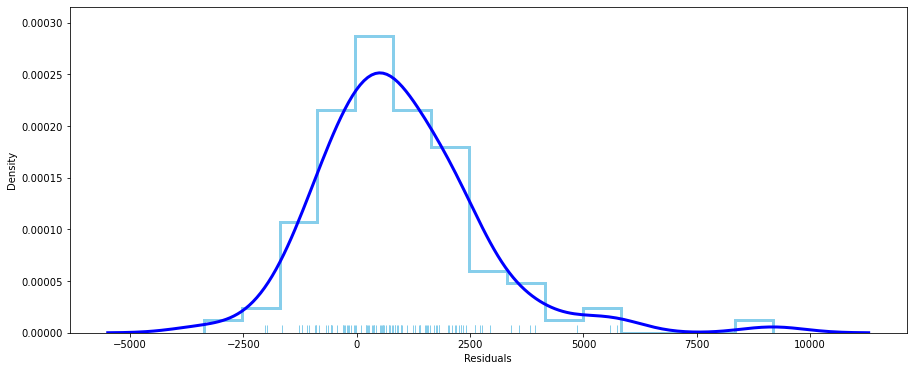

In [105]:
## Normality test
sns.distplot(RFresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'Random Forest Regression HomoscedasticityPlot (Predicted vs Residuals)')

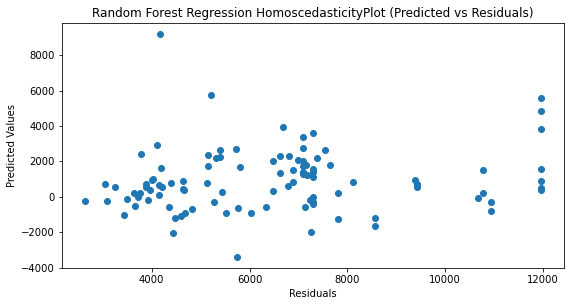

In [106]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predRandomForest,RFresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("Random Forest Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [107]:
## AdaBoost

from sklearn.ensemble import AdaBoostRegressor
modelAdaBoost = AdaBoostRegressor()
modelAdaBoost.fit(X_train, y_train)
y_modelAdaBoost = modelAdaBoost.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_modelAdaBoost))

Evaluation metric results:-
MSE is : 3969986.005623815
MAE is : 1496.0098861344566
RMSE is : 1992.4823727259961
MAPE is : 46.1286631990076
R2 is : 0.6129216216832608

None


In [108]:
print("AdaBoost Regression Model parameters:",modelAdaBoost.get_params())
print("AdaBoost Regression Model score:",modelAdaBoost.score(X_train,y_train)*100,"%")
print("AdaBoost Regression number of features:",modelAdaBoost.n_features_in_)

AdaBoost Regression Model parameters: {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}
AdaBoost Regression Model score: 60.79325018805839 %
AdaBoost Regression number of features: 1


In [109]:
y_modelAdaBoost=y_modelAdaBoost.reshape(100,1)

In [110]:
predada= pd.DataFrame(y_modelAdaBoost)
predada.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_AdaBoostpredictions_dataframe.csv",index = False,header=True)

In [111]:
actual_pred["adb"]=y_modelAdaBoost
adb=actual_pred

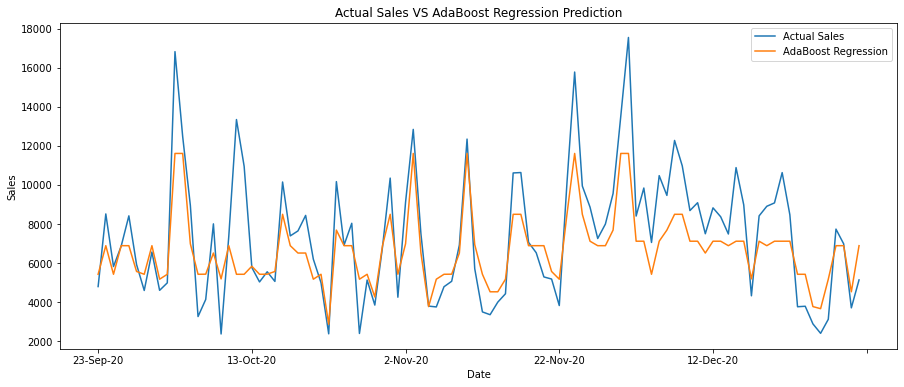

In [112]:
adb['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
adb['adb'].plot(figsize=(15,6), label = "AdaBoost Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS AdaBoost Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [113]:
AdaBoostResidual=y_test.values-y_modelAdaBoost

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

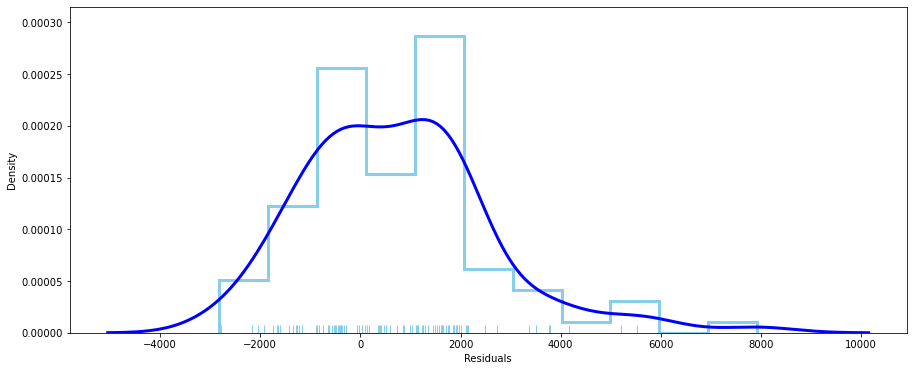

In [114]:
## Normality test
sns.distplot(AdaBoostResidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'AdaBoost Regression HomoscedasticityPlot (Predicted vs Residuals)')

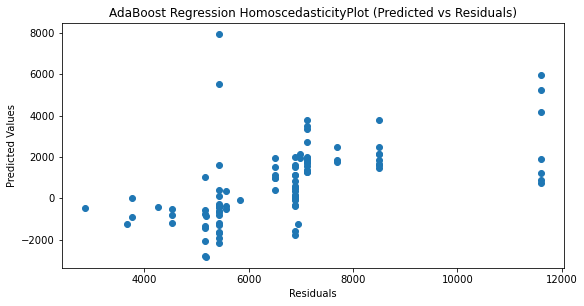

In [115]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_modelAdaBoost,AdaBoostResidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("AdaBoost Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [116]:
#Gradient Boosting (GBM)
from sklearn.ensemble import GradientBoostingRegressor
modelGBM= GradientBoostingRegressor()
modelGBM.fit(X_train, y_train)
y_predGBM = modelGBM.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predGBM))

Evaluation metric results:-
MSE is : 3188535.1591808004
MAE is : 1224.7062766417846
RMSE is : 1785.6469861595826
MAPE is : 50.529409983540205
R2 is : 0.6891140127765577

None


In [117]:
print("Gradient Boosting (GBM) Regression Model parameters:",modelGBM.get_params())
print("Gradient Boosting (GBM) Regression Model score:",modelGBM.score(X_train,y_train)*100,"%")
print("Gradient Boosting (GBM) Regression number of features:",modelGBM.n_features_in_)

Gradient Boosting (GBM) Regression Model parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Gradient Boosting (GBM) Regression Model score: 77.55587004717049 %
Gradient Boosting (GBM) Regression number of features: 1


In [118]:
y_predGBM=y_predGBM.reshape(100,1)


In [119]:
predGBM= pd.DataFrame(y_predGBM)
predGBM.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_GBMpredictions_dataframe.csv",index = False,header=True)

In [120]:
actual_pred["gbm"]=y_predGBM
gbm=actual_pred

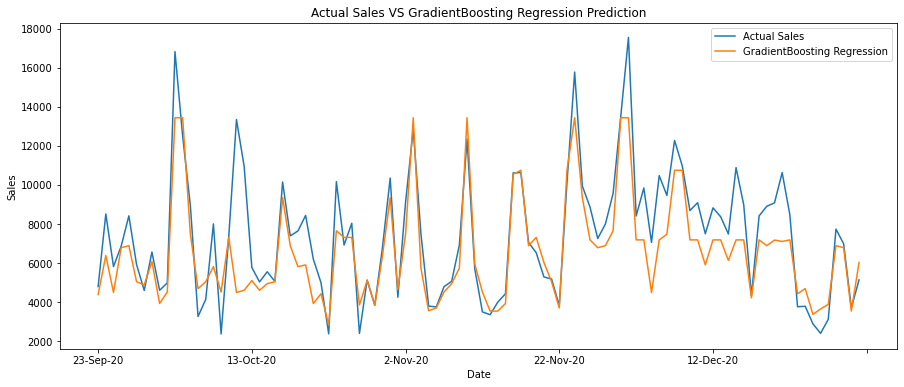

In [121]:
gbm['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
gbm['gbm'].plot(figsize=(15,6), label = "GradientBoosting Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS GradientBoosting Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [122]:
GBMresidual=y_test.values-y_predGBM

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

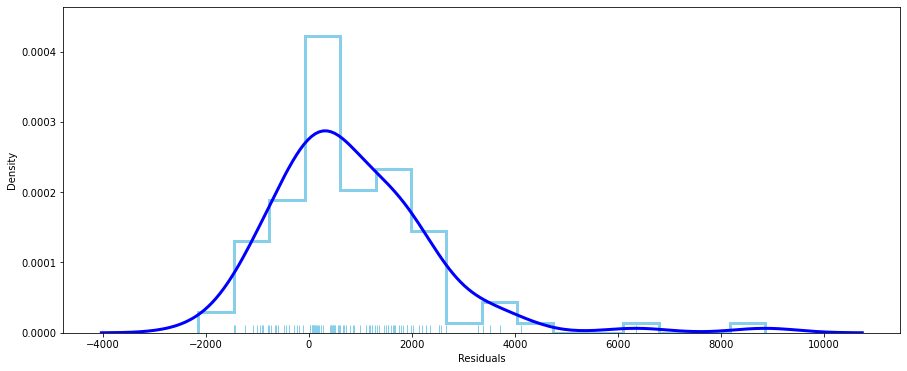

In [123]:
## Normality test
sns.distplot(GBMresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'GBM Regression HomoscedasticityPlot (Predicted vs Residuals)')

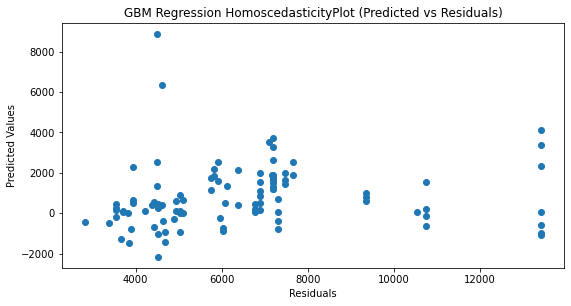

In [124]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predGBM,GBMresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("GBM Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [125]:
## XGBoost

import xgboost as xgb
model_xgb=xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_predxgb = model_xgb.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predxgb))

Evaluation metric results:-
MSE is : 3762631.287257154
MAE is : 1394.1412683593746
RMSE is : 1939.7503156997175
MAPE is : 51.66173467933628
R2 is : 0.6331389544416113

None


In [126]:
print("XGBoost Regression Model parameters:",model_xgb.get_params())
print("XGBoost Regression Model score:",model_xgb.score(X_train,y_train)*100,"%")
print("XGBoost Regression number of features:",model_xgb.n_features_in_)

XGBoost Regression Model parameters: {'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 2, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
XGBoost Regression Model score: 85.69549028556045 %
XGBoost Regression number of features: 1


In [127]:
y_predxgb=y_predxgb.reshape(100,1)

In [128]:
predxgb= pd.DataFrame(y_predxgb)
predxgb.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_XGBpredictions_dataframe.csv",index = False,header=True)

In [129]:
actual_pred["xgbm"]=y_predxgb
xgbm=actual_pred

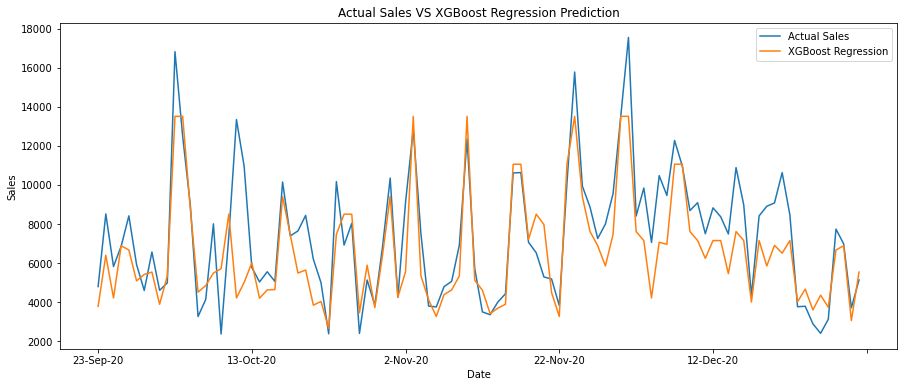

In [130]:
xgbm['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
xgbm['xgbm'].plot(figsize=(15,6), label = "XGBoost Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS XGBoost Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [131]:
XGBresidual=y_test.values-y_predxgb

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

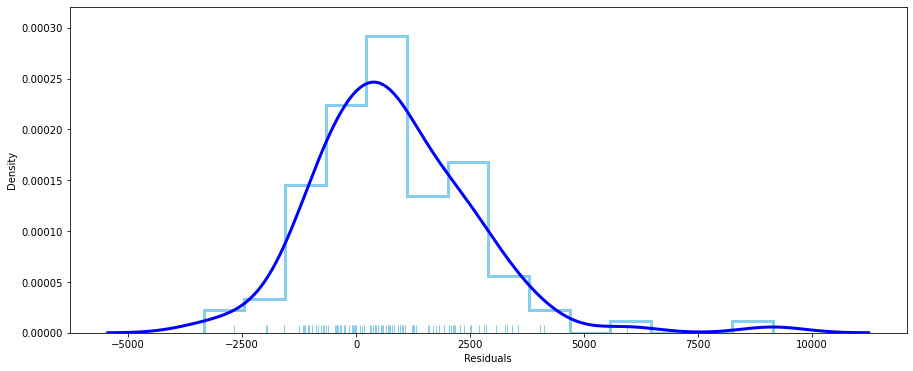

In [132]:
## Normality test
sns.distplot(XGBresidual,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'XGB Regression HomoscedasticityPlot (Predicted vs Residuals)')

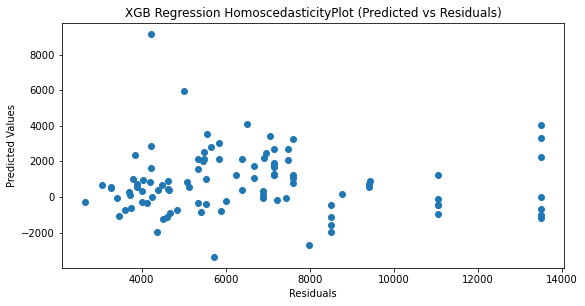

In [133]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predxgb,XGBresidual)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("XGB Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [134]:

import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.1}
model_lgb= lgb.train(params, train_data, 900)
#from sklearn.metrics import mean_squared_error
#rmse=mean_squared_error(y_pred,y_test)**0.5
y_predlgb = model_lgb.predict(X_test)
print(regression_evaluation_metrics_func(y_test,y_predlgb))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 1
[LightGBM] [Info] Start training from score 4224.554319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Evaluation metric results:-
MSE is : 4748434.238116139
MAE is : 1417.3657820078774
RMSE is : 2179.0902317518057
MAPE is : 49.28786744521985
R2 is : 0.5370219890372476

None


In [135]:
model_lgb


In [136]:
model_lgb.params

{'learning_rate': 0.1, 'num_iterations': 900, 'early_stopping_round': None}

In [137]:
y_predlgb=y_predlgb.reshape(100,1)

In [138]:
predlgb= pd.DataFrame(y_predlgb)
predlgb.to_csv(r"C:\Users\cash\Desktop\Forecasting and Predicriom Notebooks&Datasets RJ\exported_LightGBMpredictions_dataframe.csv",index = False,header=True)

In [142]:
actual_pred["LightGBM"]=y_predlgb
LightGBM=actual_pred

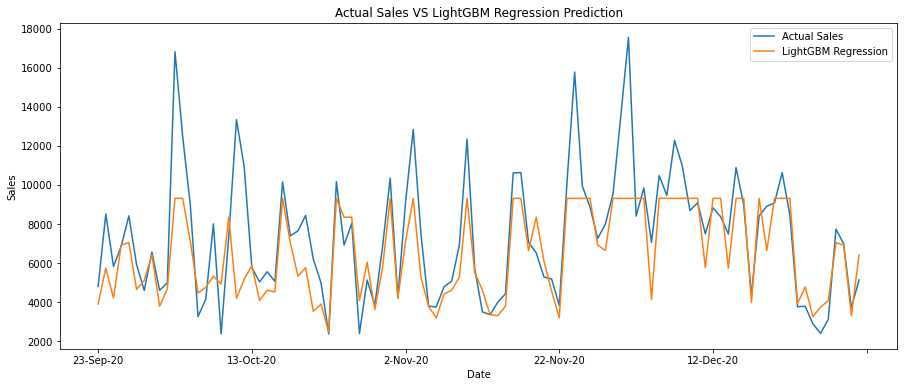

In [143]:
LightGBM['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
LightGBM['LightGBM'].plot(figsize=(15,6), label = "LightGBM Regression")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS LightGBM Regression Prediction")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [144]:
lgbRes=y_test.values-y_predlgb

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

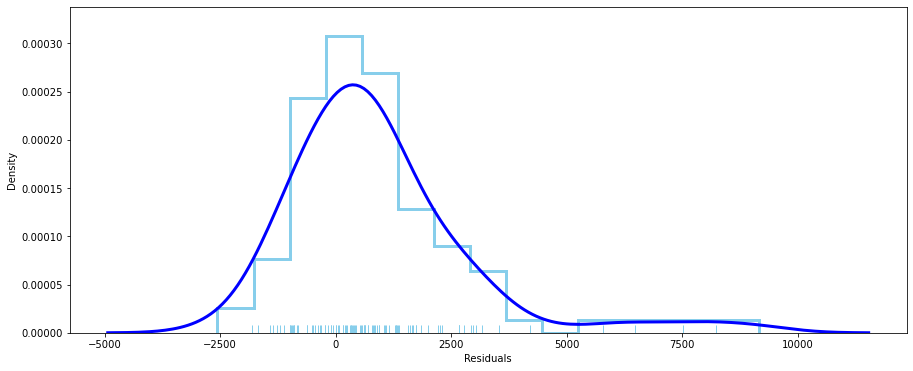

In [145]:
## Normality test
sns.distplot(lgbRes,rug=True,axlabel="Residuals", rug_kws={"color":"skyblue"},
            kde_kws={"color":"b","lw":3,"label":"Denstity Curve"},
            hist_kws={"histtype":"step","linewidth":3,
                     "alpha":1,"color":"skyblue"})

Text(0.5, 1.0, 'LightGBM Regression HomoscedasticityPlot (Predicted vs Residuals)')

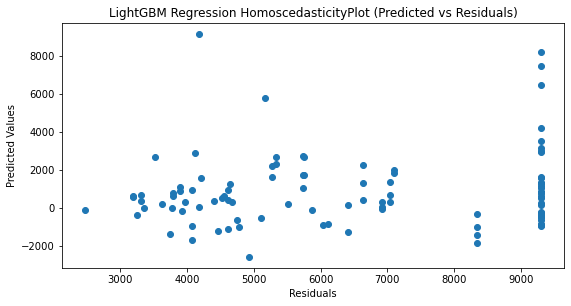

In [146]:
##Homoskedatscity test
import pylab
fid,ax = plt.subplots(figsize=(9,4.5))
_=ax.scatter(y_predlgb,lgbRes)
plt.ylabel("Predicted Values")
plt.xlabel("Residuals")
plt.title("LightGBM Regression HomoscedasticityPlot (Predicted vs Residuals)")

In [147]:
from IPython.display import Image

In [148]:
rmse = pd.read_csv("acc2.csv")
    #rmse.set_index("Model", inplace =True)

In [149]:
import seaborn as sns
sns.set()

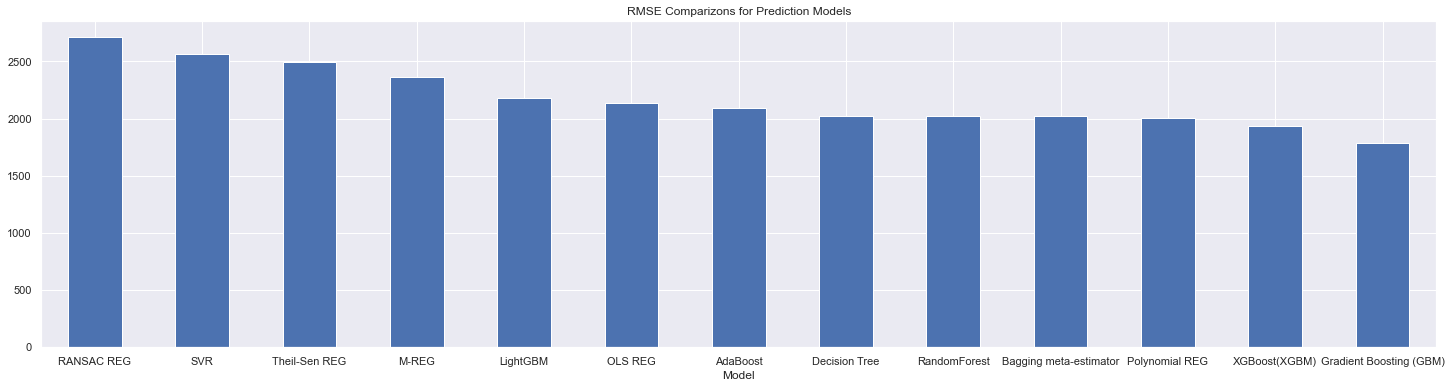

In [150]:
rmse.set_index("Model")["RMSE"].plot.bar(rot=0,title = "RMSE Comparizons for Prediction Models",figsize=(25,6))
plt.show()

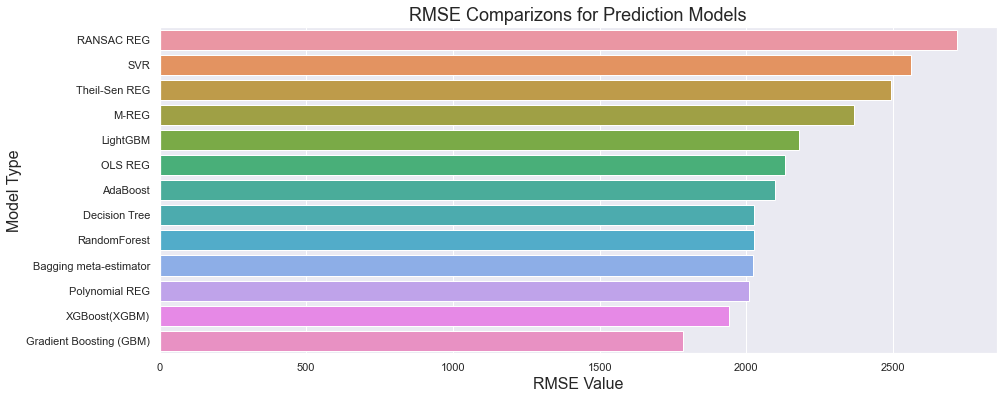

In [151]:
sns.barplot(x="RMSE", y = "Model", data=rmse,)
plt.xlabel('RMSE Value',fontsize = 16)
plt.ylabel('Model Type',fontsize = 16)
plt.title('RMSE Comparizons for Prediction Models',fontsize=18)
plt.show()

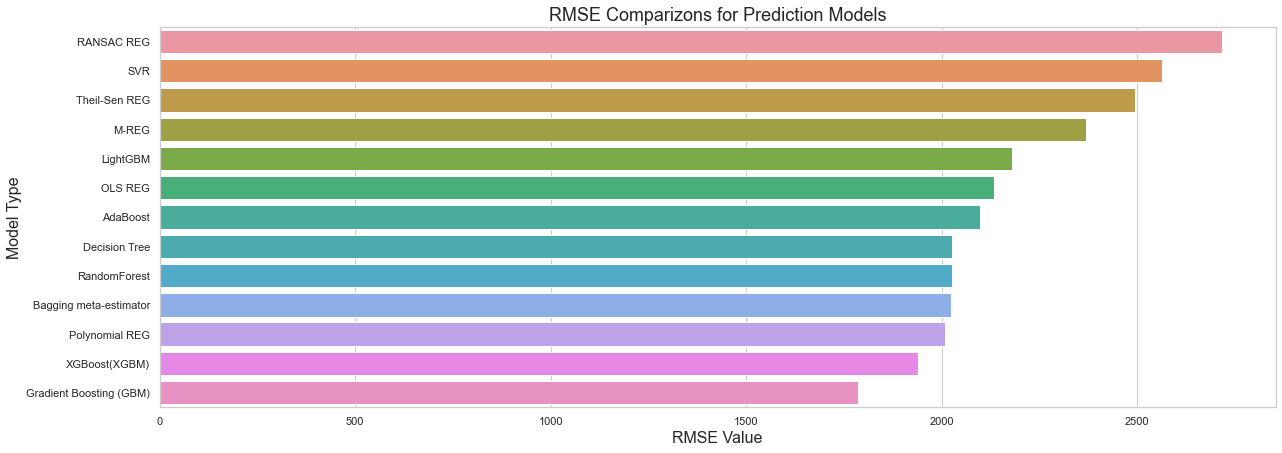

In [152]:
plt.rcParams['figure.figsize']= [20,7]
sns.set_style('darkgrid')
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x="RMSE", y = "Model", data=rmse)
plt.xlabel('RMSE Value',fontsize = 16)
plt.ylabel('Model Type',fontsize = 16)
plt.title('RMSE Comparizons for Prediction Models',fontsize=18)
plt.show()